# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"





# Optional delay for loading the page
#browser.is_element_present_by_css('div.lest_text',wait_time=1)



In [4]:
browser.visit(url)

In [5]:
# Save the HTML from the browser

html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
soup_html=soup(html,'html.parser')


In [7]:
#Find table 
table=soup_html.find('table', class_='table')


In [8]:
#Extract Rows in table
rows=table.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
mars_facts={}
# Loop through the scraped data to create a list of rows
for row in rows:
    row_heading=row.find('th')
    row_data= row.find('td')

    mars_facts[row_heading]=row_data


In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

mars_=pd.read_html(url)

In [11]:
# Confirm DataFrame was created successfully
mars_df=mars_[0]

mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [13]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [14]:
# Change data types for data analysis
mars_df["terrestrial_date"]=pd.to_datetime(mars_df["terrestrial_date"], dayfirst=True)


mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [15]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
month_count=mars_df.month.nunique()

month_count

12

In [17]:
# 2. How many Martian days' worth of data are there?
sol_count=mars_df['sol'].value_counts
sol_count

<bound method IndexOpsMixin.value_counts of 0         10
1         11
2         12
3         13
4         14
        ... 
1862    1973
1863    1974
1864    1975
1865    1976
1866    1977
Name: sol, Length: 1867, dtype: int64>

In [18]:
mars_df['sol'].nunique()

1867

In [19]:
# 3. What is the average low temperature by month?
average_low_temp=mars_df.groupby(['month']).mean()['min_temp']

average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

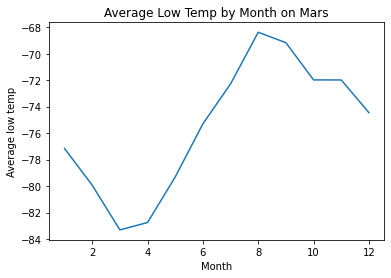

In [20]:
# Plot the average temperature by month
average_low_temp.plot()
plt.title("Average Low Temp by Month on Mars")
plt.ylabel('Average low temp')
plt.xlabel('Month')
plt.show

In [21]:
# Identify the coldest and hottest months in Curiosity's location
mars_df.median()

id           959.0
sol         1028.0
ls           160.0
month          6.0
min_temp     -76.0
pressure     853.0
dtype: float64

In [22]:
# Identify the coldest and hottest months in Curiosity's location

#coldest month 
coldest_month = average_low_temp.min()


coldest_month





-83.30729166666667

In [23]:
#Hottest month
hottest_month=average_low_temp.max()

hottest_month

-68.38297872340425

In [24]:
# 4. Average pressure by Martian month
average_pressure=mars_df.groupby(['sol']).mean()['pressure']

average_pressure

sol
10      739.0
11      740.0
12      741.0
13      732.0
14      740.0
        ...  
1973    730.0
1974    729.0
1975    729.0
1976    728.0
1977    727.0
Name: pressure, Length: 1867, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

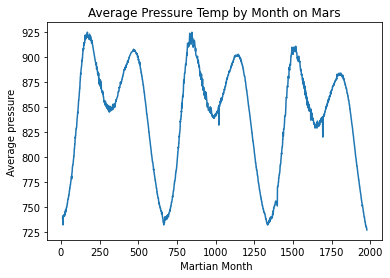

In [25]:
# Plot the average pressure by month
average_pressure.plot()
plt.title("Average Pressure Temp by Month on Mars")
plt.ylabel('Average pressure')
plt.xlabel(' Martian Month')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

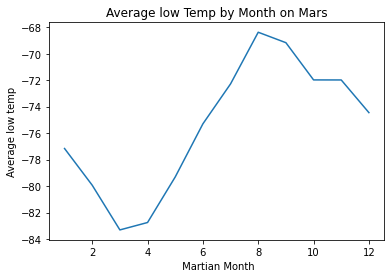

In [26]:
average_low_temp.plot()
plt.title("Average low Temp by Month on Mars")
plt.ylabel('Average low temp')
plt.xlabel(' Martian Month')
plt.show

Distance between peaks: 587 terrestrial days


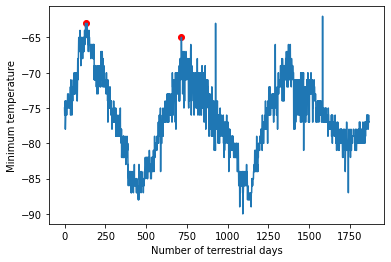

In [27]:




# Create a new DataFrame with index as a separate column 'terrestrial_days'
df_new = mars_df.reset_index().rename(columns={'index': 'terrestrial_days'})

# Filter the data for each range
df_range1 = df_new[(df_new['terrestrial_days'] >= 0) & (df_new['terrestrial_days'] <= 400)]
df_range2 = df_new[(df_new['terrestrial_days'] >= 401) & (df_new['terrestrial_days'] <= 800)]

# Find the peaks in each range
peaks_range1, _ = find_peaks(df_range1['min_temp'])
peaks_range2, _ = find_peaks(df_range2['min_temp'])

# Find the highest peak in each range
highest_peak_range1 = df_range1.iloc[peaks_range1]['min_temp'].idxmax()
highest_peak_range2 = df_range2.iloc[peaks_range2]['min_temp'].idxmax()

# Calculate the distance between the highest peaks
distance_between_peaks = highest_peak_range2 - highest_peak_range1

# Print the distance
print(f"Distance between peaks: {distance_between_peaks} terrestrial days")

# Plot the data
plt.plot(df_new['terrestrial_days'], df_new['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')

# Highlight the highest peaks on the plot
plt.scatter([highest_peak_range1, highest_peak_range2], [df_new['min_temp'][highest_peak_range1], df_new['min_temp'][highest_peak_range2]], c='red', marker='o')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV

mars_df.to_csv('mars_weather.csv')



In [29]:
browser.quit()